# 百日馬拉松-學習精華

### Day003

#### 請寫一個函式用來計算 Mean Square Error(均方誤差):「誤差」的平方的期望值。
$ MSE = \frac{1}{n}\sum_{i=1}^{n}{(Y_i - \hat{Y}_i)^2} $
  Hint: [如何取平方](https://googoodesign.gitbooks.io/-ezpython/unit-1.html)

In [20]:
import numpy as np
import matplotlib.pyplot as plt
# 定義 mean_squared_error 這個函數, 計算並傳回 MSE
def mean_squared_error(y, yp):
    """
    計算 MSE
    Args:
        - y: 實際值
        - yp: 預測值
    Return:
        - mse: MSE
    """
    # 主要是下面這一行
    mse = sum((y - yp)**2) / len(y)
    return mse

#### mean absolute error(MAE)(平均絕對誤差): 是絕對誤差的平均值（絕對值後所求的平均值）or能更好地反映預測值誤差的實際情況（幫助測量）,又被稱為 L1 損失 或 L1 範數損失。
[什麼是平均絕對誤差 Mean Absolute Error, MAE？](https://staruphackers.com/%E4%BB%80%E9%BA%BC%E6%98%AF%E5%B9%B3%E5%9D%87%E7%B5%95%E5%B0%8D%E8%AA%A4%E5%B7%AE-mean-absolute-error-mae%EF%BC%9F/)
![Image of Yaktocat](https://staruphackers.com/wp-content/uploads/2019/04/image-4-300x57.png?is-pending-load=1)

In [21]:
import numpy as np
import matplotlib.pyplot as plt
def mean_absolute_error(y, yp):
    """
    計算 MAE
    Args:
        - y: 實際值
        - yp: 預測值
    Return:
        - mae: MAE
    """
    mae = MAE = sum(abs(y - yp)) / len(y)
    return mae

### Day004 : EDA/讀取資料與分析流程
- The exploratory data analysis (EDA) : 運用視覺化、基本的統計等工具，來「看」一下資料；以期進行複雜或嚴謹的分析之前，能夠對資料有更多的認識。
- app_train.iloc[:10, 0:5] # 前 10 row 以及前 5 個 column

In [1]:
# 用 python擷取 csv檔
import os
import numpy as np
import pandas as pd
#設定 data_path 檔案路徑
dir_data = './data/'
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app) #app_train這個變數表示這個 csv的內容

Path of read in data: ./data/application_train.csv


### Day005 : 如何新建一個 dataframe? 如何讀取其他資料? (非 csv 的資料)
- 方法一: 用 pd.DataFrame (將 dict轉成DataFrame)
- 方法二: 用 zip  (將多個 list轉成DataFrame)
- numpy.random.rand() 產生隨機數組 [python產生隨機數列表](https://blog.csdn.net/christianashannon/article/details/78867204)
- 如何讀取其他資料? (非 csv 的資料) requests、re
[正則表達測試網站!!!超好用](https://regex101.com/)

In [2]:
# 方法一: 用 pd.DataFrame (將 dict轉成DataFrame)
data = {'weekday': ['Sun', 'Sun', 'Mon', 'Mon'],
        'city': ['Austin', 'Dallas', 'Austin', 'Dallas'],
        'visitor': [139, 237, 326, 456]}
visitors_1 = pd.DataFrame(data)
print(visitors_1)

  weekday    city  visitor
0     Sun  Austin      139
1     Sun  Dallas      237
2     Mon  Austin      326
3     Mon  Dallas      456


In [7]:
# 方法二: 用 zip  (將多個 list轉成DataFrame)
cities = ['Austin', 'Dallas', 'Austin', 'Dallas']
weekdays = ['Sun', 'Sun', 'Mon', 'Mon']
visitors = [139, 237, 326, 456]

list_cols_content = [cities, weekdays, visitors]
list_labels = ['city', 'weekday', 'visitor']

zipped = list(zip(list_labels, list_cols_content))
visitors_2 = pd.DataFrame(dict(zipped))
print(visitors_2)

     city weekday  visitor
0  Austin     Sun      139
1  Dallas     Sun      237
2  Austin     Mon      326
3  Dallas     Mon      456


In [4]:
# 將網路上的資料url抓進python使用
import re
import requests
target_url = "https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt"
response = requests.get(target_url)

#伺服器回應的狀態碼
print(response.status_code) #回應200代表正常

# 檢查狀態碼是否 OK
try:    
    if response.status_code == requests.codes.ok:
      print("OK")
except:
    print("伺服器無回應")

data = response.text #<class 'str'>
# 用 request 傳送回來的資料不會認得斷行符號
print(len(data))
data[0:100]

200
OK
784594


'n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg\nn00015388_238\thttp://farm2'

In [5]:
# 將 txt 轉成 pandas dataframe
import pandas as pd
import requests
import re
target_url = 'https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt'
response = requests.get(target_url)
data = response.text
data = data.split("\n")  #python內建的split斷行
arrange_data = []

# 利用re正規表示式拿掉亂碼，只留下網址。
#x = re.compile('[a-z0-9]+_[0-9]+') # 去掉n00433802_4955這類的亂碼 #發現連結一部份被拿掉，所以不好用
#x1 = re.compile('\t')

for d in data:
    line = d.split("\t")
    arrange_data.append(line)
#print(type(arrange_data)) <class 'list'>
df = pd.DataFrame(arrange_data)
#print(type(df))  <class 'pandas.core.frame.DataFrame'>
df.head()

,0,1
0,n00015388_157,http://farm1.static.flickr.com/145/430300483_2...
1,n00015388_238,http://farm2.static.flickr.com/1005/3352960681...
2,n00015388_304,http://farm1.static.flickr.com/27/51009336_a96...
3,n00015388_327,http://farm4.static.flickr.com/3025/2444687979...
4,n00015388_355,http://img100.imageshack.us/img100/3253/forres...


In [6]:
# 讀取圖片，請讀取上面 data frame 中的前 5 張圖片
from PIL import Image
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt

def img2arr_fromURLs(url_list, resize = False):
    img_list = []
    for url in url_list:
        response = requests.get(url)
        try:
            img = Image.open(BytesIO(response.content))
            if resize:
                img = img.resize((256,256))  # 假如 resize，就先統一到 256 x 256
            img = np.array(img)
            img_list.append(img)
        except:# 如果圖片失聯了就 pass。
            #   只有在 response.status_code 為 200 時，才可以取得圖片，若有 404 或其他 status code, 會碰到 Error, 所以
            #我們用 Try 語法避開取不到的狀況。
            pass
    return img_list

import requests
result = img2arr_fromURLs(df[0:5][1].values)
print("Total images that we got: %i " % len(result)) # 如果不等於 5, 代表有些連結失效囉

for im_get in result:
    plt.imshow(im_get)
    plt.show()

Total images that we got: 4 


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

In [ ]:
# 文本(txt)
with open(‘example.txt’, ‘r’) as f: 
    data = f.readlines() 
print(data)

In [ ]:
# 讀取Json
import json
with open(‘example.json’, ‘r’) as f:
    data = json.load(f)
print(data)

In [ ]:
# 矩陣檔(mat)
import scipy.io as sio
data = sio.loadmat(‘example.mat’)


### Day006 : EDA: 欄位的資料類型介紹及處理
1. Label encoding : 把每個類別 mapping 到某個整數，不會增加新欄位。(原始資料是有序離散值)
* One hot encoding : 為每個類別新增一個欄位，用 0/1 表示是否。(原始資料是無序離散值)
[初學Python手記#3-資料前處理( Label encoding、 One hot encoding)
](https://medium.com/@PatHuang/%E5%88%9D%E5%AD%B8python%E6%89%8B%E8%A8%98-3-%E8%B3%87%E6%96%99%E5%89%8D%E8%99%95%E7%90%86-label-encoding-one-hot-encoding-85c983d63f87)
[Label Encoder vs. One Hot Encoder in Machine Learning]https://medium.com/@contactsunny/label-encoder-vs-one-hot-encoder-in-machine-learning-3fc273365621
- DataFrame如何檢測欄位的型態數量、各欄型態

- Label encoding=> 

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

A = le.fit_transform()
- One hot encoding=> pd.get_dummies(..., drop_first=True)  去掉原本的第一個欄位，建模時避免產生高度共線性。

In [9]:
# 1. Label encoding
'''
有仔細閱讀參考資料的人可以發現，Label encoding 的表示方式會讓同一個欄位底下的類別之間有大小關係
(0<1<2<...)，所以在這裡我們只對有類別數量小於等於 2 的類別型欄位示範使用 Label encoding，但不
表示這樣處理是最好的，一切取決於欄位本身的意義適合哪一種表示方法。
'''
import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
# 設定 data_path
dir_data = './data/'
f_app_train = os.path.join(dir_data, 'application_train.csv')
f_app_test = os.path.join(dir_data, 'application_test.csv')

app_train = pd.read_csv(f_app_train)
app_test = pd.read_csv(f_app_test)

In [10]:
# 3. 檢視資料中各個欄位類型的數量
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [11]:
# 3. 檢視資料中類別型欄位各自類別的數量
app_train.select_dtypes(include=["object"]).apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [12]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [16]:
# Label encoding
# 將 Country欄的字串轉換成數字(進行編碼)，這樣才能套入數學模型進行運算。
import numpy as np
import pandas as pd
country=['Taiwan','Australia','Ireland','Australia','Ireland','Taiwan']
age=[25,30,45,35,22,36]
salary=[20000,32000,59000,60000,43000,52000]
dic={'Country':country,'Age':age,'Salary':salary}
data=pd.DataFrame(dic)
data

,Country,Age,Salary
0,Taiwan,25,20000
1,Australia,30,32000
2,Ireland,45,59000
3,Australia,35,60000
4,Ireland,22,43000
5,Taiwan,36,52000


In [17]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data_le=pd.DataFrame(dic)
data_le['Country'] = labelencoder.fit_transform(data_le['Country'])
data_le

,Country,Age,Salary
0,2,25,20000
1,0,30,32000
2,1,45,59000
3,0,35,60000
4,1,22,43000
5,2,36,52000


In [8]:
# 2. One Hot encoding
import os
import numpy as np
import pandas as pd
# 設定 data_path, 並讀取 app_train
dir_data = './data/'
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
sub_train = pd.DataFrame(app_train['WEEKDAY_APPR_PROCESS_START'])
print(sub_train.shape)
sub_train.head()

(307511, 1)


,WEEKDAY_APPR_PROCESS_START
0,WEDNESDAY
1,MONDAY
2,MONDAY
3,WEDNESDAY
4,THURSDAY


In [15]:
sub_train = pd.get_dummies(sub_train, drop_first=True)
print(sub_train.shape)
sub_train.head()

(307511, 7)


,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY
0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1
4,0,0,0,0,1,0,0


### Day007 : 特徵類型 (如何將欄位名稱, 依照所屬類型分開, 並列出指定類型的部分資料)
- 如何觀察目前的 DataFrame 中, 有哪些欄位類型, 以及數量各有多少
- 如何將欄位名稱依欄位類型分開
- 如何只顯示特定類型的欄位資料
- [groupby()用法](https://ithelp.ithome.com.tw/articles/10194027)
- aggregate()
- 將欄位的資料型別分類，方便做後續的 特徵工程 處理。(資料前處理->特徵工程->model set)
- df[int_features].mean() 平均
- df[int_features].max()  最大
- df[int_features].nunique() 相異值

In [3]:
# 載入基本套件
import pandas as pd
import numpy as np

# 讀取訓練與測試資料
data_path = './data/'
df_train = pd.read_csv(data_path + 'house_train.csv.gz')
df_test = pd.read_csv(data_path + 'house_test.csv.gz')
df_train.shape

(1460, 81)

In [4]:
'''
train_Y為 訓練集 的預測輸出。(SalePrice)
df_train為 訓練集 的feature輸入。(train_X)(不包含Id、SalePrice)
ids為每個資料都是獨一無二的，所以不需要重複，另外存成一個欄位。
df_test為 測試集 的feature輸入，所以裡面沒有Saleprice，只要拿掉Id就好。
df = pd.concat([df_train,df_test])  df裡只有訓練用的輸入資料(沒有ID、SalePrice)

np.log1p()取log的優點有兩個:
1. 讓資料的值變小
2. 讓資料間的差距也相對變小更平穩
'''
# 訓練資料需要 train_X, train_Y / 預測輸出需要 ids(識別每個預測值), test_X
# 在此先抽離出 train_Y 與 ids, 而先將 train_X, test_X 該有的資料合併成 df, 先作特徵工程
train_Y = np.log1p(df_train['SalePrice'])
ids = df_test['Id']
df_train = df_train.drop(['Id', 'SalePrice'] , axis=1)
df_test = df_test.drop(['Id'] , axis=1)
df = pd.concat([df_train,df_test])
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [8]:
df.dtypes.reset_index()

,index,0
0,MSSubClass,int64
1,MSZoning,object
2,LotFrontage,float64
3,LotArea,int64
4,Street,object
5,Alley,object
6,LotShape,object
7,LandContour,object
8,Utilities,object
9,LotConfig,object


In [5]:
# 秀出資料欄位的類型與數量
# df.dtypes : 轉成以欄位為 index, 類別(type)為 value 的 DataFrame
# .reset_index() : 預設是將原本的 index 轉成一個新的欄位, 如果不須保留 index, 則通常會寫成 .reset_index(drop=True)
'''
資料concat後，一定要做 reset_index()的處理，否則容易出現莫名的邏輯錯誤。
groupby() https://ithelp.ithome.com.tw/articles/10194027
groupby("Column Type") => 依照 Column Type 分組
aggregate('count') => 將每組的資料計算出一個 Count
'''
# 這邊採用的寫法稱為 f-string, 是 Python 3.6.2 以後版本才出現的
# 如果無法執行, 則需要更新到這個版本之後, 或自行將程式改寫為 str.format 形式
# 改寫方式可以參考 https://blog.louie.lu/2017/08/08/outdate-python-string-format-and-fstring/
dtype_df = df.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df = dtype_df.groupby("Column Type").aggregate('count').reset_index()
dtype_df

,Column Type,Count
0,int64,25
1,float64,11
2,object,43


In [6]:
#確定只有 int64, float64, object 三種類型後, 分別將欄位名稱存於三個 list 中
int_features = []
float_features = []
object_features = []

# df.dtypes列印出所有欄位的資料型態。 df.columns列印出所有欄位名稱。
for dtype, feature in zip(df.dtypes, df.columns): 
    if dtype == 'float64':
        float_features.append(feature)
    elif dtype == 'int64':
        int_features.append(feature)
    else:
        object_features.append(feature)
print(f'{len(int_features)} Integer Features : {int_features}\n')
print(f'{len(float_features)} Float Features : {float_features}\n')
print(f'{len(object_features)} Object Features : {object_features}')

25 Integer Features : ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']

11 Float Features : ['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea']

43 Object Features : ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'Fi

In [14]:
#這樣就可以單獨秀出特定類型的欄位集合, 方便做後續的特徵工程處理
df[float_features].head()

,LotFrontage,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,GarageYrBlt,GarageCars,GarageArea
0,65.0,196.0,706.0,0.0,150.0,856.0,1.0,0.0,2003.0,2.0,548.0
1,80.0,0.0,978.0,0.0,284.0,1262.0,0.0,1.0,1976.0,2.0,460.0
2,68.0,162.0,486.0,0.0,434.0,920.0,1.0,0.0,2001.0,2.0,608.0
3,60.0,0.0,216.0,0.0,540.0,756.0,1.0,0.0,1998.0,3.0,642.0
4,84.0,350.0,655.0,0.0,490.0,1145.0,1.0,0.0,2000.0,3.0,836.0


### Day008 : 資料清理理數據前處理理: EDA資料分佈
基本上使用下列統計特徵就可以讓我們初步了了解資料的樣⼦子，並且觀察是否有異異樣:
1. 計算集中趨勢
  - 平均值 Mean
  - 中位數 Median
  - 眾數 Mode
2. 計算資料分散程度
  - 最小值 Min
  - 最大值 Max
  - 範圍 Range
  - 四分位差 Quartiles
  - 變異異數 Variance
  - 標準差 Standard deviation
- EDA視覺化的方式 : [matplotlib](https://matplotlib.org/gallery/index.html) [seaborn](https://seaborn.pydata.org/examples/index.html)
- 直方圖 (範例)

In [16]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

# 設定 data_path
dir_data = './Data/'

f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)

import matplotlib.pyplot as plt
%matplotlib inline 
# 魔法函数（Magic Functions），可以省略掉plt.show()的步驟。


# 不想顯示成科學記號的話，要加上pd.set_option('display.float_format', lambda x: '%.3f' % x)
app_train['AMT_INCOME_TOTAL'].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

Text(0.5, 0, 'AMT_INCOME_TOTAL')

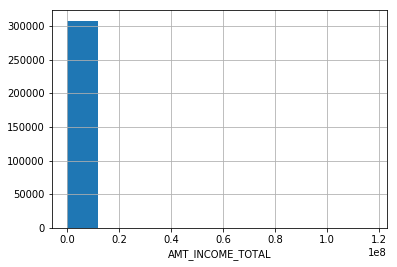

In [17]:
app_train['AMT_INCOME_TOTAL'].hist()
plt.xlabel('AMT_INCOME_TOTAL')

### 注意到該欄位的最大值和 75% 百分位數的值有異常大的差距，所以直接畫直方圖會看不出所以然來，可以先過濾掉再重新畫圖來看

Text(0.5, 0, 'AMT_INCOME_TOTAL')

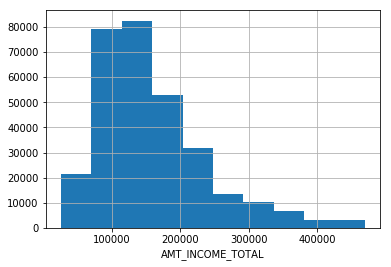

In [18]:
# 下面這一行看不懂
'''
app_train['AMT_INCOME_TOTAL'] < app_train['AMT_INCOME_TOTAL'].quantile(0.99)
=> 這一段在比較 AMT_INCOME_TOTAL 欄位是否小於 99 分位數，會是一個 Ture/False 的 Series

app_train.loc[ ... ]
=> 這一段把上面那個 Ture/False 的 Series 當成條件，會選出 AMT_INCOME_TOTAL 欄位是否小於 99 分位數 的資料

app_train.loc[ ... ]['AMT_INCOME_TOTAL']
=> 從符合條件的資料中，取出 AMT_INCOME_TOTAL 欄位

app_train.loc[ ... ]['AMT_INCOME_TOTAL'].hist()
=> 畫成長條圖
'''
app_train.loc[app_train['AMT_INCOME_TOTAL']<app_train['AMT_INCOME_TOTAL'].quantile(0.99)]['AMT_INCOME_TOTAL'].hist()
plt.xlabel('AMT_INCOME_TOTAL')

### Day009 : 資料清理理數據前處理 EDA:離群值(Outlier)及其處理

1. 異常值(Outliers)出線的可能原因
  - 可能的錯誤紀錄/⼿手誤/系統性錯誤
  - 未知值，隨意填補
- 檢查Outliers的流程與方法
  - 盡可能確認每⼀一個欄欄位的意義 (但有些競賽資料不會提供欄欄位意義)
  - 透過檢查數值範圍 (五值、平均數及標準差) 或繪製散點圖 (scatter)、分布圖 (histogram) 或其他圖檢查是否有異異常
- 對Outliers的處理方法
  - 新增欄欄位⽤用以紀錄異異常與否
  - 填補 (取代)
  - 視情況以中位數, Min, Max 或平均數填補(有時會⽤用 NA)
  
[Ways to Detect and Remove the Outliers](https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba)

[How to Use Statistics to Identify Outliers in Data](https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/)

# 這邊很重要，有難度，下列會有如何找到異常數據的方法

In [2]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# 設定 data_path
dir_data = './data/'

In [3]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: ./data/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


### 開始檢視不同欄位是否有異常值

In [4]:
# DAYS_BIRTH: 客戶申請貸款時的年齡
(app_train['DAYS_BIRTH'] / (-365)).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

In [5]:
# DAYS_EMPLOYED: 申請貸款前，申請人已在現職工作的時間
(app_train['DAYS_EMPLOYED'] / 365).describe()

count    307511.000000
mean        174.835742
std         387.056895
min         -49.073973
25%          -7.561644
50%          -3.323288
75%          -0.791781
max        1000.665753
Name: DAYS_EMPLOYED, dtype: float64

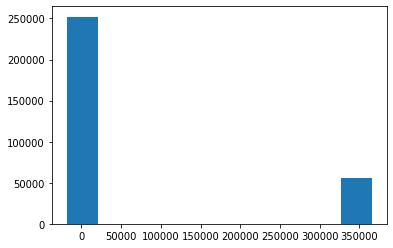

In [6]:
plt.hist(app_train['DAYS_EMPLOYED'])
plt.show()

In [7]:
'''
pd.value_counts()可以計算欄位中每個值的次數，並將值由大到小排序。index為值 value為次數
'''
app_train['DAYS_EMPLOYED'].value_counts()

 365243    55374
-200         156
-224         152
-199         151
-230         151
-212         150
-229         143
-384         143
-231         140
-215         138
-207         138
-188         137
-216         137
-116         136
-196         136
-222         135
-193         134
-195         133
-214         132
-213         131
-254         131
-381         130
-201         130
-233         128
-185         128
-237         127
-194         127
-184         126
-234         126
-209         125
           ...  
-12768         1
-10604         1
-10857         1
-8810          1
-14955         1
-11113         1
-11369         1
-13420         1
-10346         1
-10860         1
-12649         1
-10358         1
-12650         1
-10870         1
-12919         1
-14968         1
-13175         1
-11382         1
-10101         1
-12150         1
-10603         1
-12393         1
-9694          1
-11741         1
-13162         1
-11115         1
-11371         1
-11883        

### 從上面的圖與數值可以看出, 365243 顯然是個奇怪的數值

In [8]:
'''
anom: 把365243另外存起來
non_anom: 正常值
TARGET : 1=有付款困難的客戶  0=所有其他情況
'''
anom = app_train[app_train['DAYS_EMPLOYED'] == 365243]
non_anom = app_train[app_train['DAYS_EMPLOYED'] != 365243]
print('The non-anomalies default on %0.2f%% of loans' % (100 * non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anom))

The non-anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
There are 55374 anomalous days of employment


In [9]:
# 查看DAYS_EMPLOYED天數=365243的資料佔全部資料的比例。
sum(app_train['DAYS_EMPLOYED'] == 365243)/len(app_train)

0.18007160719453938

In [10]:
# 新增一個欄位: DAYS_EMPLOYED_ANOM 來標記 DAYS_EMPLOYED 是否異常
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
print(app_train['DAYS_EMPLOYED_ANOM'].value_counts())
'''
True=55374個，所以有55374個資料是365243的異常天數。
'''

False    252137
True      55374
Name: DAYS_EMPLOYED_ANOM, dtype: int64


'\nTrue=55374個，所以有55374個資料是365243的異常天數。\n'

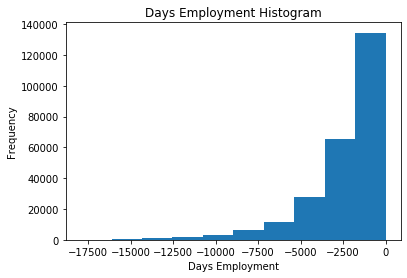

In [11]:
# 這邊我們用 nan 將異常值取代
# df 的 replace用法
# http://s0pandas0pydata0org.icopy.site/pandas-docs/stable/reference/api/pandas.Series.replace.html
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

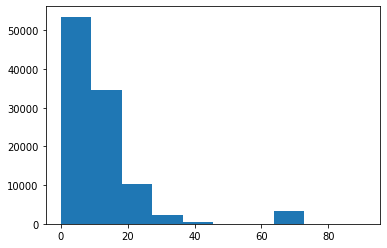

7.0     7424
6.0     6382
3.0     6370
8.0     5887
2.0     5852
4.0     5557
1.0     5280
9.0     5020
10.0    4806
14.0    4594
13.0    4566
12.0    4257
11.0    4161
5.0     3595
15.0    3580
16.0    3355
17.0    2899
64.0    2443
18.0    2418
0.0     2134
19.0    1864
20.0    1527
21.0    1462
22.0    1250
24.0    1150
23.0    1067
65.0     891
25.0     865
26.0     580
28.0     542
        ... 
30.0     326
31.0     267
32.0     208
34.0     183
35.0     157
33.0     132
36.0     124
38.0      97
40.0      85
39.0      78
37.0      75
41.0      58
42.0      42
44.0      21
43.0      19
54.0      12
45.0      11
49.0       6
46.0       5
55.0       4
51.0       3
63.0       2
91.0       2
69.0       1
48.0       1
52.0       1
56.0       1
47.0       1
50.0       1
57.0       1
Name: OWN_CAR_AGE, Length: 62, dtype: int64

In [12]:
# 檢查 OWN_CAR_AGE: 貸款人的車齡
plt.hist(app_train[~app_train.OWN_CAR_AGE.isnull()]['OWN_CAR_AGE'])
plt.show()
app_train['OWN_CAR_AGE'].value_counts()

In [13]:
app_train[app_train['OWN_CAR_AGE'] > 50]['OWN_CAR_AGE'].value_counts()

64.0    2443
65.0     891
54.0      12
55.0       4
51.0       3
91.0       2
63.0       2
57.0       1
69.0       1
52.0       1
56.0       1
Name: OWN_CAR_AGE, dtype: int64

### 從上面我們可以發現車齡為 64, 65 的人特別多，是否合理?
記得，這沒有正確答案 - 但我們總是可以給他們一些標記，讓最後的模型來決定

In [14]:
print("Target of OWN_CAR_AGE >= 50: %.2f%%" % (app_train[app_train['OWN_CAR_AGE'] >= 50 ]['TARGET'].mean() * 100 ))
print("Target of OWN_CAR_AGE < 50: %.2f%%" % (app_train[app_train['OWN_CAR_AGE'] < 50]['TARGET'].mean() * 100))

app_train['OWN_CAR_AGE_ANOM'] = app_train['OWN_CAR_AGE'] >= 50

Target of OWN_CAR_AGE >= 50: 8.36%
Target of OWN_CAR_AGE < 50: 7.21%


### 請參考 HomeCredit_columns_description.csv 的欄位說明，觀察並列出三個你覺得可能有 outlier 的欄位並解釋可能的原因

Numbers of remain columns: 7


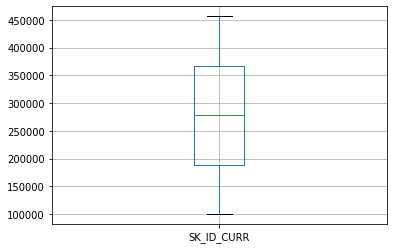

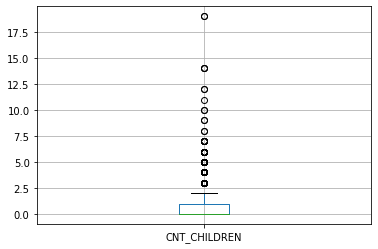

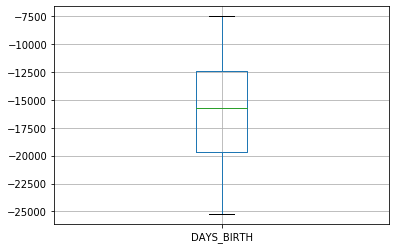

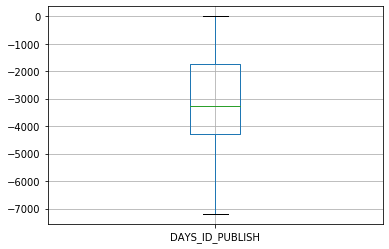

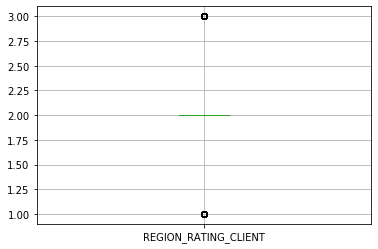

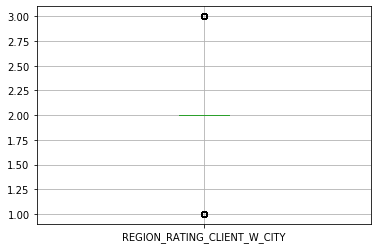

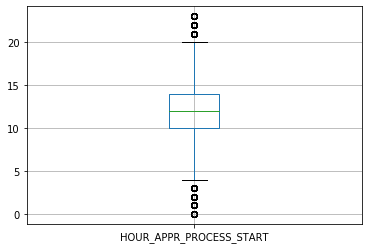

In [15]:
'''
因為是要找出可能有outlier 的欄位，所以針對數值型的欄位做檢查。
'''
# 先篩選數值型的欄位
numeric_columns = list(app_train.columns[list(app_train.dtypes.isin([np.int64, np.float64]))])

'''
app_train[numeric_columns].apply(lambda x:len(x.unique())!=2 )
lambda x:len(x.unique())!=2 套用在app_train[numeric_columns]裡
lambda其實就是簡易版的def fun(), 他適合用在一次性或是簡短的功能上
    lambda x:len(x.unique())!=2 : 先定義一個變數x ，x 會等於len(x.unique()) != 2 ,也就是x唯一值的數量不等於二 
----------------------------------------------------------------------
apply 跟 lambda 是搭配使用的
lambda 是匿名函式，他的用法類似函式，以下兩種一樣的用法但不同寫法提供參考：
# lambda Function
lambda x: sum(x)

# Function
def f(x):
    return sum(x)
這兩種寫法都是將 x 當作輸入參數，回傳 sum(x)。

#格式化字串（formatting string），其用法是「在字串中篩入變數」，其用法如下：
w = 'world'
p = 'python'
s = 'hello %s, I love %s' % (w, p)
執行 s = .. 這行的時候，會將 % 後面的變數，依序取代掉左邊字串中的 %s，這就是格式化字串。
'''
# 再把只有 2 值 (通常是 0,1) 的欄位去掉
numeric_columns = list(app_train[numeric_columns].columns[list(app_train[numeric_columns].apply(lambda x:len(x.unique())!=2 ))])
print("Numbers of remain columns: %i" % len(numeric_columns)) # 0 表示

# 檢視這些欄位的數值範圍
for col in numeric_columns:
    app_train.boxplot(col)
    plt.show()

(array([5.3501e+04, 3.4636e+04, 1.0248e+04, 2.3360e+03, 4.8600e+02,
        3.0000e+01, 8.0000e+00, 3.3350e+03, 0.0000e+00, 2.0000e+00]),
 array([ 0. ,  9.1, 18.2, 27.3, 36.4, 45.5, 54.6, 63.7, 72.8, 81.9, 91. ]),
 <a list of 10 Patch objects>)

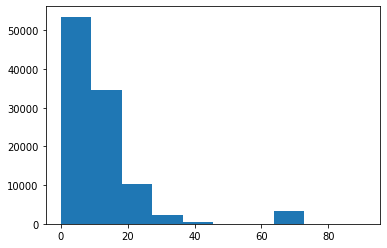

In [16]:
a = app_train['OWN_CAR_AGE'].dropna()
plt.hist(a)

In [ ]:
# 從上面的圖檢查的結果，至少這三個欄位好像有點可疑

# AMT_INCOME_TOTAL
# REGION_POPULATION_RELATIVE
# OBS_60_CNT_SOCIAL_CIRCLE

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64


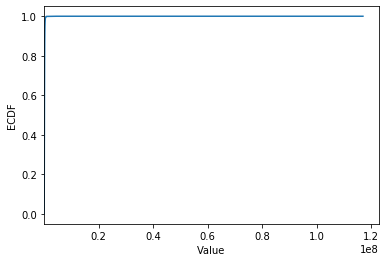

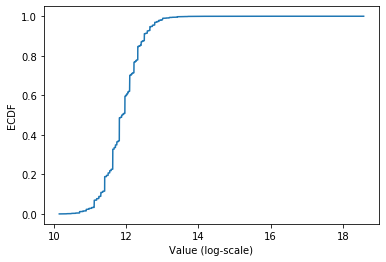

In [21]:
# 最大值離平均與中位數很遠
print(app_train['AMT_INCOME_TOTAL'].describe())

'''
# 因為直方圖對訊息會壓縮到一個區間，如果想要顯示所有的數據點，就用ECDF。
經驗累積分佈函數圖：ECDF（Empirical Cumulative Distribution Function）
https://medium.com/ai%E5%8F%8D%E6%96%97%E5%9F%8E/exploratory-data-analysis-%E6%8E%A2%E7%B4%A2%E8%B3%87%E6%96%99-ecdf-7fa350c32897
ECDF的Y軸表示到這個點的數據佔全部的幾%。

# pd.value_counts()可以計算欄位中每個值的次數，並將值由大到小排序。index為值 value為次數
cumsum()對值做累加。所以cdf值的最後一項等於資料數總和。
'''
# 繪製 Empirical Cumulative Density Plot (ECDF)
cdf = app_train.AMT_INCOME_TOTAL.value_counts().sort_index().cumsum()
plt.plot(list(cdf.index), cdf/cdf.max())
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.xlim([cdf.index.min(), cdf.index.max() * 1.05]) # 限制顯示圖片的範圍
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍
plt.show()

# 因為value數值間差距過大，取log減少數據間的相對差異。
plt.plot(np.log(list(cdf.index)), cdf/cdf.max())
plt.xlabel('Value (log-scale)')
plt.ylabel('ECDF')
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍
plt.show()

In [23]:
cdf

25650.0             2
26100.0             5
26460.0             6
26550.0             8
27000.0            74
27585.0            75
27900.0            82
27967.5            83
28161.0            84
28350.0            95
28404.0            96
28575.0            99
28593.0           100
28723.5           101
28800.0           104
29133.0           105
29250.0           137
29583.0           138
29700.0           141
30150.0           148
30600.0           154
30915.0           155
31050.0           156
31500.0           340
31531.5           341
31815.0           342
31860.0           343
31950.0           347
31990.5           348
32040.0           349
                ...  
1358550.0      307423
1381500.0      307424
1417500.0      307425
1440000.0      307427
1530000.0      307428
1575000.0      307446
1665000.0      307447
1755000.0      307448
1800000.0      307462
1890000.0      307466
1935000.0      307467
2025000.0      307475
2070000.0      307476
2160000.0      307477
2214117.0 

### 補充：Normal dist 的 ECDF
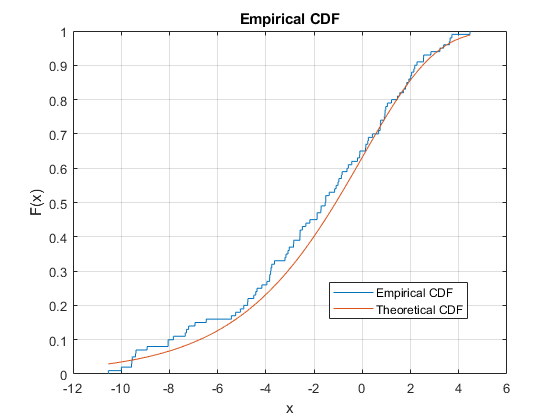

count    307511.000000
mean          0.020868
std           0.013831
min           0.000290
25%           0.010006
50%           0.018850
75%           0.028663
max           0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64


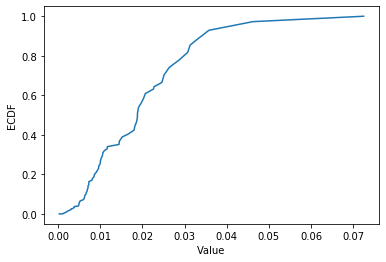

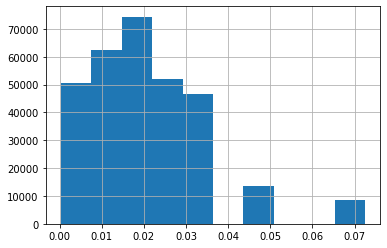

0.035792    16408
0.046220    13442
0.030755    12163
0.025164    11950
0.026392    11601
0.031329    11321
0.028663    11157
0.019101     8694
0.072508     8412
0.020713     8066
0.018850     7668
0.020246     7178
0.018634     7038
0.022625     6943
0.015221     6824
0.032561     6636
0.024610     6404
0.019689     6172
0.018029     6167
0.018801     6108
0.018209     6052
0.014520     4785
0.016612     4408
0.007020     4105
0.022800     3807
0.010032     3570
0.010006     3563
0.014464     3422
0.004960     3300
0.011703     3252
            ...  
0.006008     1796
0.003069     1783
0.008575     1763
0.008474     1740
0.007274     1724
0.007114     1684
0.006305     1672
0.008068     1668
0.008866     1654
0.006671     1653
0.002042     1642
0.003813     1616
0.005084     1482
0.006296     1225
0.005313     1218
0.003818     1212
0.003122     1147
0.006233     1087
0.005002     1068
0.002134     1051
0.004849     1038
0.005144      967
0.002506      944
0.003541      627
0.001276  

In [18]:
# 最大值落在分布之外
print(app_train['REGION_POPULATION_RELATIVE'].describe())

# 繪製 Empirical Cumulative Density Plot (ECDF)
cdf = app_train.REGION_POPULATION_RELATIVE.value_counts().sort_index().cumsum()
plt.plot(list(cdf.index), cdf/cdf.max())
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍
plt.show()

app_train['REGION_POPULATION_RELATIVE'].hist()
plt.show()

app_train['REGION_POPULATION_RELATIVE'].value_counts()

# 就以這個欄位來說，雖然有資料掉在分布以外，也不算異常，僅代表這間公司在稍微熱鬧的地區有的據點較少，
# 導致 region population relative 在少的部分較為密集，但在大的部分較為疏漏

count    306490.000000
mean          1.405292
std           2.379803
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64


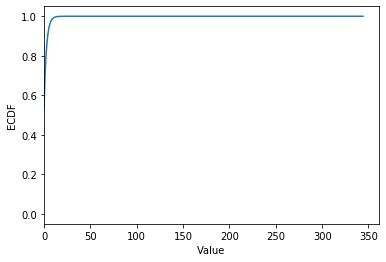

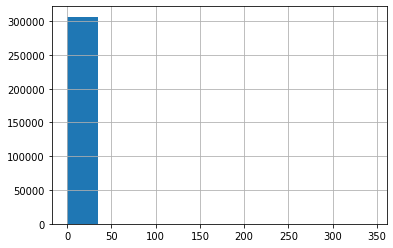

344.0         1
47.0          1
30.0          1
29.0          2
28.0          1
27.0          5
26.0          1
25.0         11
24.0         12
23.0         13
22.0         20
21.0         28
20.0         30
19.0         44
18.0         49
17.0         73
16.0        137
15.0        166
14.0        238
13.0        401
12.0        620
11.0        837
10.0       1335
9.0        1959
8.0        2886
7.0        4344
6.0        6349
5.0        9463
4.0       13946
3.0       20215
2.0       29766
1.0       48870
0.0      164666
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: int64

In [19]:
# 最大值落在分布之外
print(app_train['OBS_60_CNT_SOCIAL_CIRCLE'].describe())

# 繪製 Empirical Cumulative Density Plot (ECDF)
cdf = app_train.OBS_60_CNT_SOCIAL_CIRCLE.value_counts().sort_index().cumsum()
plt.plot(list(cdf.index), cdf/cdf.max())
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.xlim([cdf.index.min() * 0.95, cdf.index.max() * 1.05])
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍
plt.show()

app_train['OBS_60_CNT_SOCIAL_CIRCLE'].hist()
plt.show()

app_train['OBS_60_CNT_SOCIAL_CIRCLE'].value_counts().sort_index(ascending = False)

### 注意：當 histogram 畫出上面這種圖 (只出現一條，但是 x 軸延伸很長導致右邊有一大片空白時，代表右邊有值但是數量稀少。這時可以考慮用 value_counts 去找到這些數值

### Day010 : 機器學習前處理_數值型特徵-去除離群值
- 如果只有少數幾筆資料跟其他數值差異很大，標準化無法處理(標準化、最大最小化)。
  解決方案:
          1. 捨棄離群值(簡單暴力，如果考慮刪除應該先了解該數值離群的原因)
          2. 調整離群值。

In [32]:
#以下用房價預測資料, 觀察去除離群值的影響
# 做完特徵工程前的所有準備 (與前範例相同)
'''
最小最大化 : 將屬性縮放到一個指定的最大和最小值(通常是0~1)之間。#可以保留0的項目。
公式：X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0)) ;
X_scaler = X_std/ (max - min) + min
也可以用下列方式呼叫
from sklearn import preprocessing
preprocessing.MinMaxScaler()
'''
'''
https://ithelp.ithome.com.tw/articles/10197461
交叉驗證(Cross validation) : 為了避免依賴某一特定的訓練和測試資料產生偏差。
'''
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

data_path = 'data/'
df_train = pd.read_csv(data_path + 'house_train.csv.gz')

train_Y = np.log1p(df_train['SalePrice'])        #train_Y
df = df_train.drop(['Id', 'SalePrice'] , axis=1) #train_X
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [33]:
#只取 int64, float64 兩種數值型欄位, 存於 num_features 中
num_features = []
for dtype, feature in zip(df.dtypes, df.columns):
    if dtype == 'float64' or dtype == 'int64':
        num_features.append(feature)
print(f'{len(num_features)} Numeric Features : {num_features}\n')

36 Numeric Features : ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']



In [34]:
# 削減文字型欄位, 只剩數值型欄位
df = df[num_features]

# 缺失值全部補-1
df = df.fillna(-1)
# 特徵工程:最大最小化
MMEncoder = MinMaxScaler()
df.head()

train_num = train_Y.shape[0] #1460
'''
print(train_Y.shape)    #(1460,)
print(train_Y.shape[0]) #1460
'''

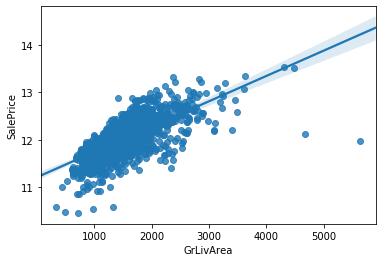

0.846643681071632

In [35]:
# 顯示 GrLivArea 與目標值的散佈圖
'''
python資料視覺化主要有三大套件:
Matplotlib、Seaborn、Plotly
'''
import seaborn as sns
import matplotlib.pyplot as plt
sns.regplot(x = df['GrLivArea'], y=train_Y)
plt.show()

# 做線性迴歸, 觀察分數
#用LinearRegression的方式套入train_X、train_Y，並找到一個適合的function
#因為資料不夠，利用cross_val_score可以降低資料的偏差，並從中找到最好的模型
'''
fit()、transform()、fit_transform()
以StandardScaler為例，fit 就是算平均值與標準差, transform 就是依照平均值標準差去轉換原資料
'''
train_X = MMEncoder.fit_transform(df)
estimator = LinearRegression()
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

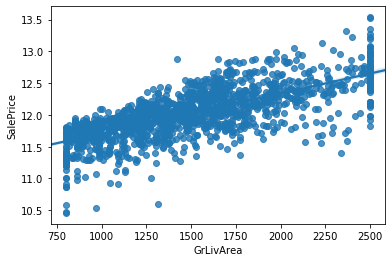

0.8590286613713278

In [36]:
# 將 GrLivArea 限制在 800 到 2500 以內, 調整離群值
# 下列也可以寫成=> df['GrLivArea'] = (df['GrLivArea']>800) & (df['GrLivArea']<2500)
df['GrLivArea'] = df['GrLivArea'].clip(800, 2500)
sns.regplot(x = df['GrLivArea'], y=train_Y)
plt.show()

# 做線性迴歸, 觀察分數
train_X = MMEncoder.fit_transform(df)
estimator = LinearRegression()
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

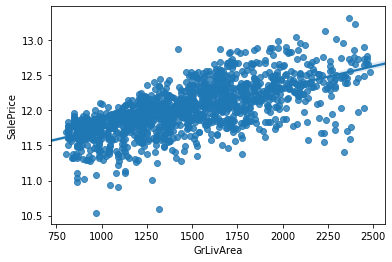

0.8765717431842281

In [37]:
# 將 GrLivArea 限制在 800 到 2500 以內, 捨棄離群值
keep_indexs = (df['GrLivArea']> 800) & (df['GrLivArea']< 2500)
df = df[keep_indexs]
train_Y = train_Y[keep_indexs]
sns.regplot(x = df['GrLivArea'], y=train_Y)
plt.show()

# 做線性迴歸, 觀察分數
train_X = MMEncoder.fit_transform(df)
estimator = LinearRegression()
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

In [ ]:
'''
如果給定的樣本資料充足，我們會隨機的從“訓練集”（X_train）中提取一部分資料來調優，這個資料集叫做“驗證集”（X_validation）。
但是，如果資料不充足，我們往往採用“交叉驗證”的方法——把給定的資料進行切分（例如分成5段），將切分的資料集分為“訓練集”和“驗證集”
（假設其中4份為train，1份為validation），在此基礎上迴圈選取（4份為train，1份為validation），進行訓練和驗證。從而選擇其中最好的模型。
'''
# 從交叉驗證的結果來看，「將 GrLivArea 限制在 800 到 2500 以內, 捨棄離群值」的
#結果是最好的，雖然這方法可以再進一步提高分數但捨棄離群資料時, 因為也同時減少了驗
#證的資料, 因此捨棄離群值未必比調整離群值好實際結果仍需再驗證